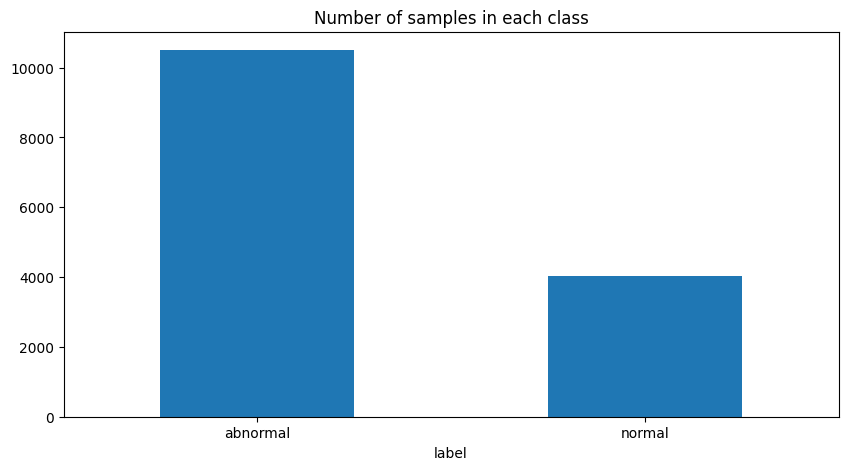

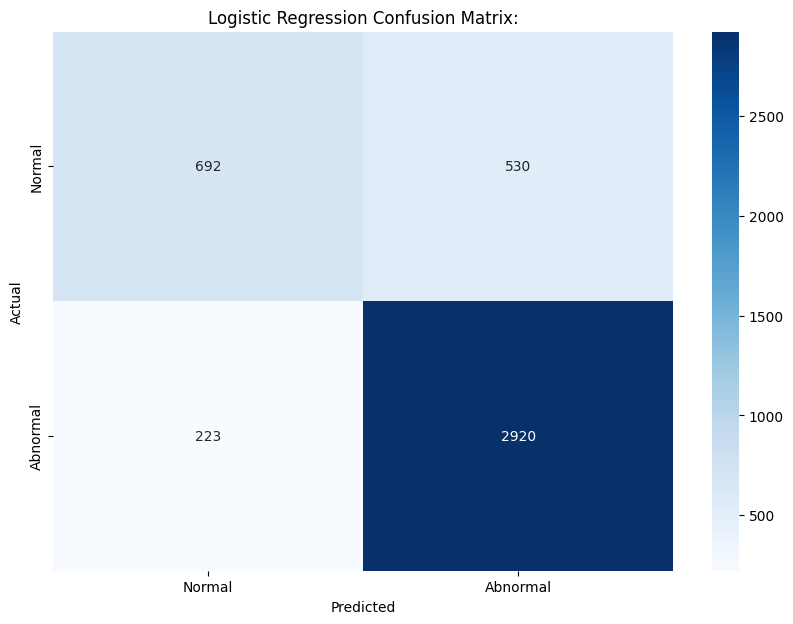

Logistic Regression Accuracy: 0.8274914089347079
Logistic Regression Precision: 0.8463768115942029
Logistic Regression Recall: 0.9290486796054724


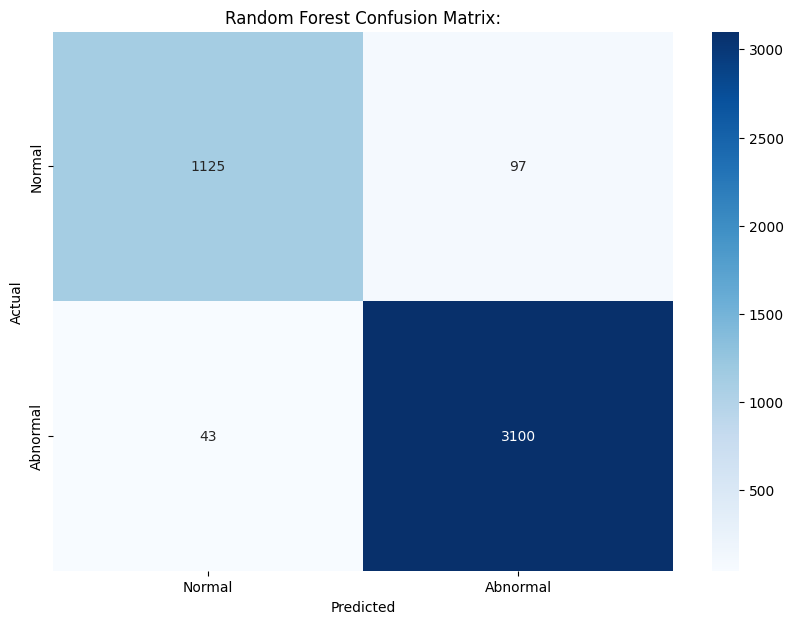

Random Forest Accuracy: 0.9679266895761741
Random Forest Precision: 0.9696590553644041
Random Forest Recall: 0.9863188036907413


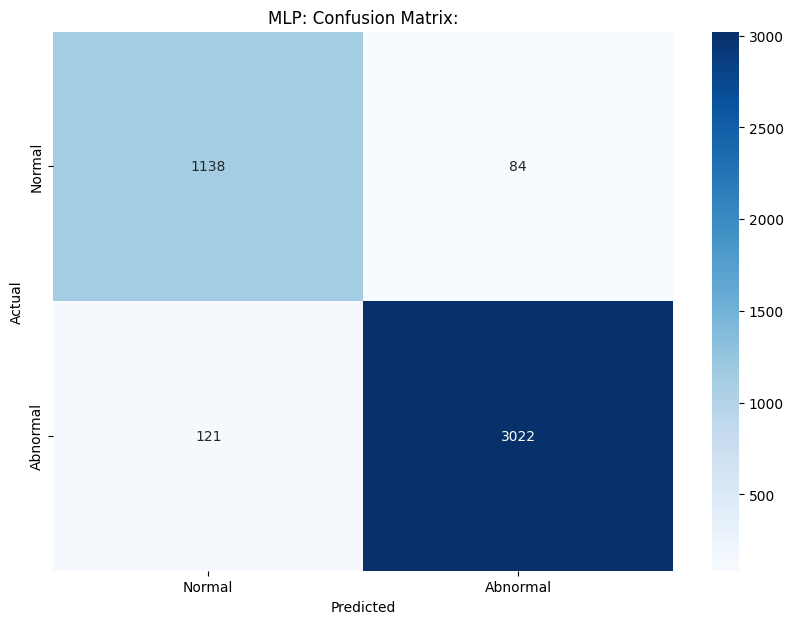

MLP: Accuracy: 0.9530355097365406
MLP: Precision: 0.9729555698647778
MLP: Recall: 0.9615017499204581


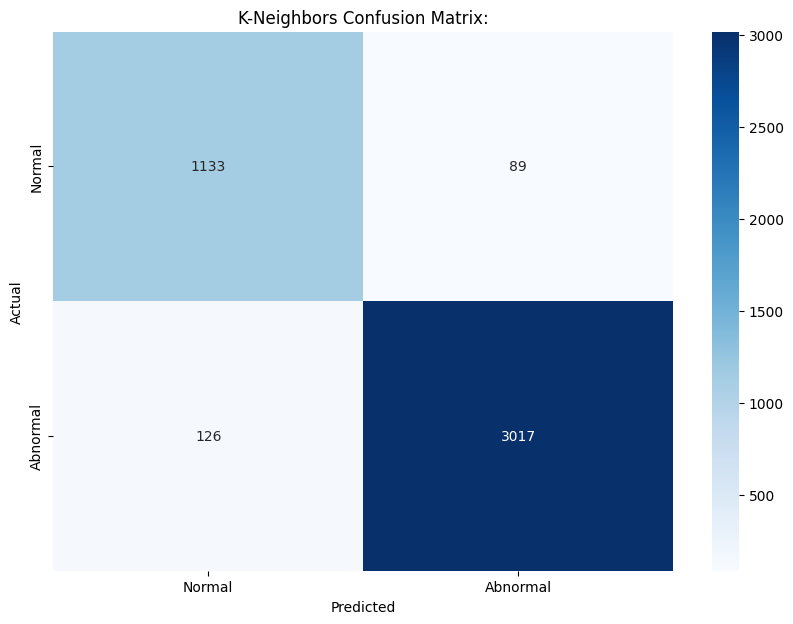

K-Neighbors Accuracy: 0.9507445589919816
K-Neighbors Precision: 0.9713457823567289
K-Neighbors Recall: 0.9599109131403119


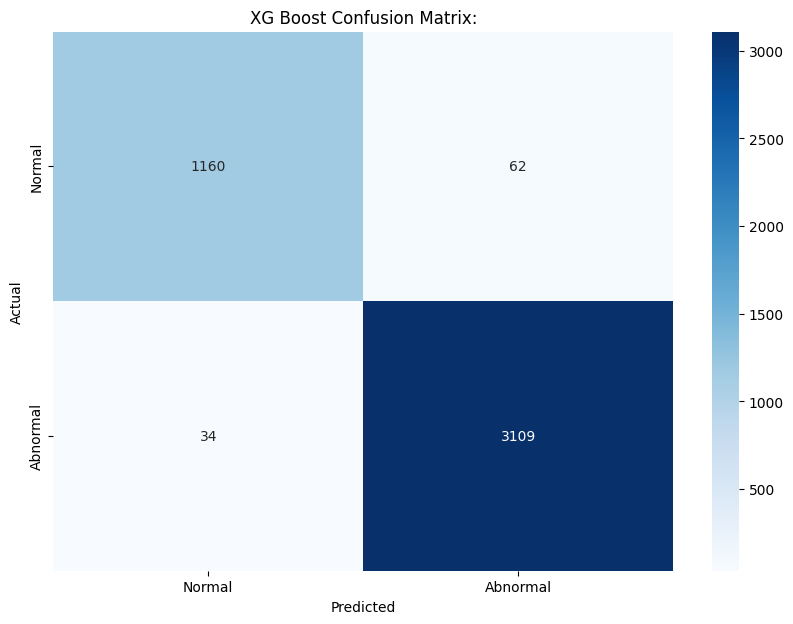

XG Boost Accuracy: 0.9780068728522336
XG Boost Precision: 0.9804478082623778
XG Boost Recall: 0.9891823098950048


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import explained_variance_score, accuracy_score, precision_score, recall_score, confusion_matrix

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
import seaborn as sns

# Read CSV files
normal = pd.read_csv('/content/ptbdb_normal.csv')
abnormal = pd.read_csv('/content/ptbdb_abnormal.csv')

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000

# for the first "num_cols" and the time steps as column names
normal.columns = list(time) + ["label"]
abnormal.columns = list(time) + ["label"]

df_ptbd = pd.concat([normal, abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

# Concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis=0)

# Check for missing values
if df_ptbd.isnull().sum().sum() > 0:
    df_ptbd = df_ptbd.dropna()

# Split the data into features and labels
X = df_ptbd.drop(columns=["label"])
y = df_ptbd["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', C=0.5),
    "Random Forest": RandomForestClassifier(),
    "MLP:": MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42),
    "K-Neighbors": KNeighborsClassifier(n_neighbors=1),
    "XG Boost": XGBClassifier()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix:")
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    precision = precision_score(y_test, y_pred)
    print(f"{name} Precision: {precision}")
    recall = recall_score(y_test, y_pred)
    print(f"{name} Recall: {recall}")



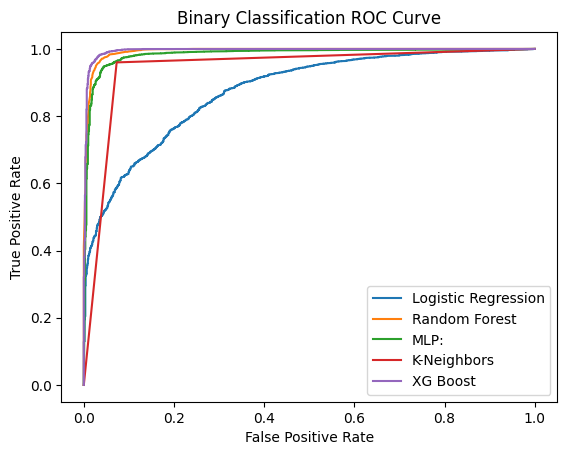

In [6]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    plt.plot(fpr, tpr, label=name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Binary Classification ROC Curve')
plt.legend()
plt.show()